In [3]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print("✅ Libraries loaded successfully!")


✅ Libraries loaded successfully!


In [4]:
# dataset
df = pd.read_csv("data_w_genres.csv")
df.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7



📊 Basic Dataset Information:
------------------------------
Dataset shape: (28680, 16)
Number of unique genres: 10743

🎵 Top 10 Genres:
------------------------------
genres
[]                                                                            9857
['movie tunes']                                                                 69
['show tunes']                                                                  63
['hollywood']                                                                   56
['orchestral performance']                                                      50
['broadway', 'hollywood', 'show tunes']                                         48
['disney', 'movie tunes']                                                       45
['sleep']                                                                       42
['contemporary country', 'country', 'country road', 'modern country rock']      41
['gospel']                                                                    

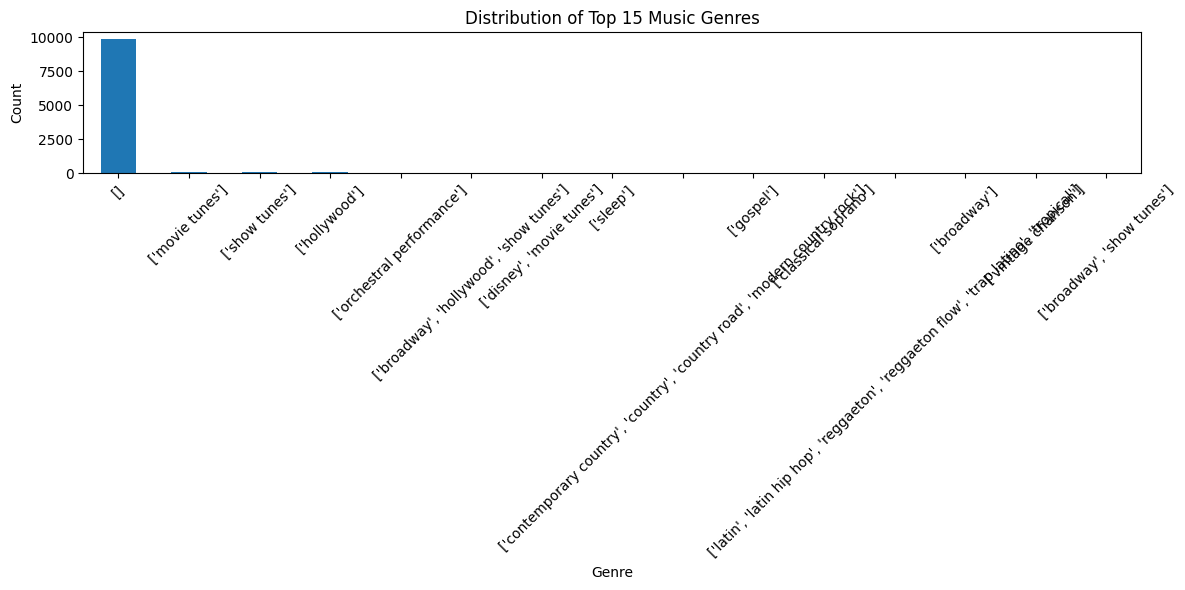

In [5]:
# Step 2: Explore dataset
print("\n📊 Basic Dataset Information:")
print("-" * 30)
print("Dataset shape:", df.shape)
print("Number of unique genres:", df['genres'].nunique())

print("\n🎵 Top 10 Genres:")
print("-" * 30)
print(df['genres'].value_counts().head(10))

print("\n📋 Dataset Overview:")
print("-" * 30)
print(df.info())

print("\n🔍 Missing Values:")
print("-" * 30)
print(df.isnull().sum())

# Optional: Display basic statistics for numerical columns
print("\n📈 Statistical Summary:")
print("-" * 30)
print(df.describe())

# Visualize genre distribution
plt.figure(figsize=(12, 6))
df['genres'].value_counts().head(15).plot(kind='bar')
plt.title('Distribution of Top 15 Music Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [6]:
# Step 3: Preprocess
# Encode target (genres -> numbers)
le = LabelEncoder()
df['genre_encoded'] = le.fit_transform(df['genres'])

# Features (drop non-numeric + target)
X = df.drop(['genres', 'artists', 'genre_encoded'], axis=1).select_dtypes(include=[np.number])
y = df['genre_encoded']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

🎯 Decision Tree Accuracy (Top 10 genres): 0.9447406689287445

Classification Report:
                                                                            precision    recall  f1-score   support

                                   ['broadway', 'hollywood', 'show tunes']       0.00      0.00      0.00         8
['contemporary country', 'country', 'country road', 'modern country rock']       0.60      0.27      0.38        11
                                                 ['disney', 'movie tunes']       0.00      0.00      0.00         7
                                                                ['gospel']       0.25      0.08      0.12        12
                                                             ['hollywood']       0.25      0.10      0.14        10
                                                           ['movie tunes']       0.00      0.00      0.00        12
                                                ['orchestral performance']       0.00      0.00      0

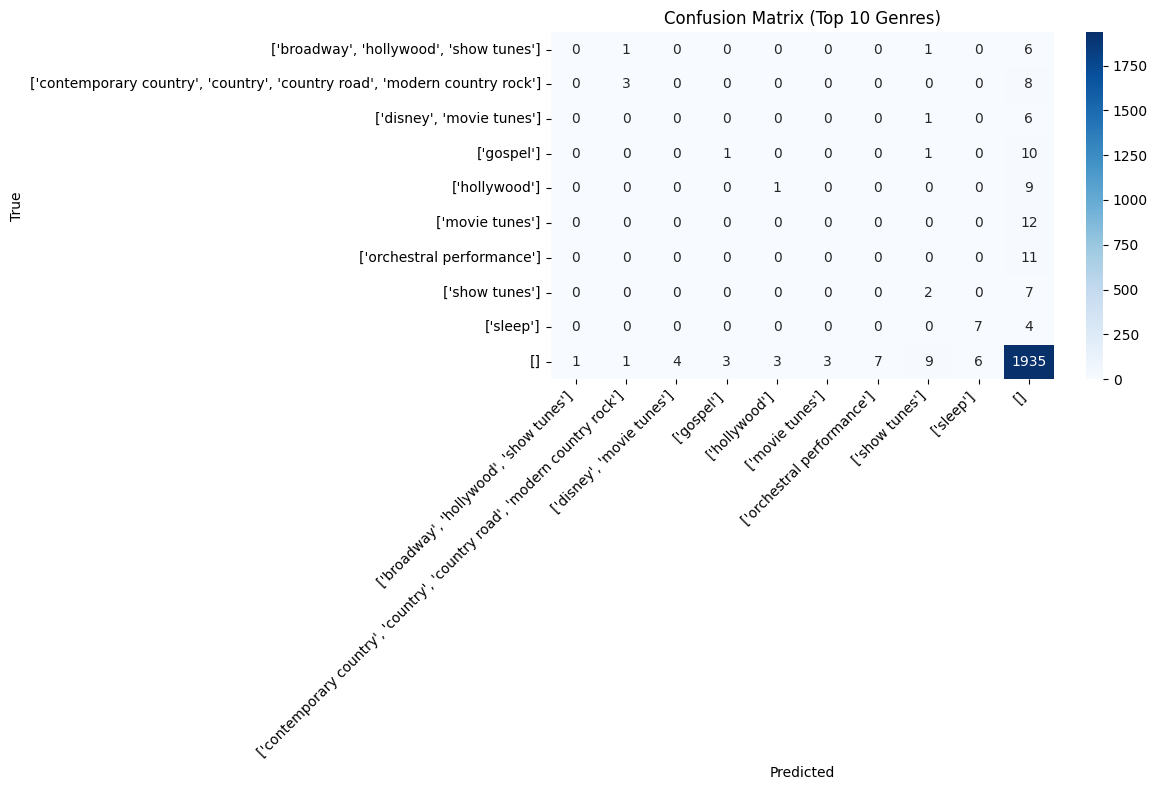

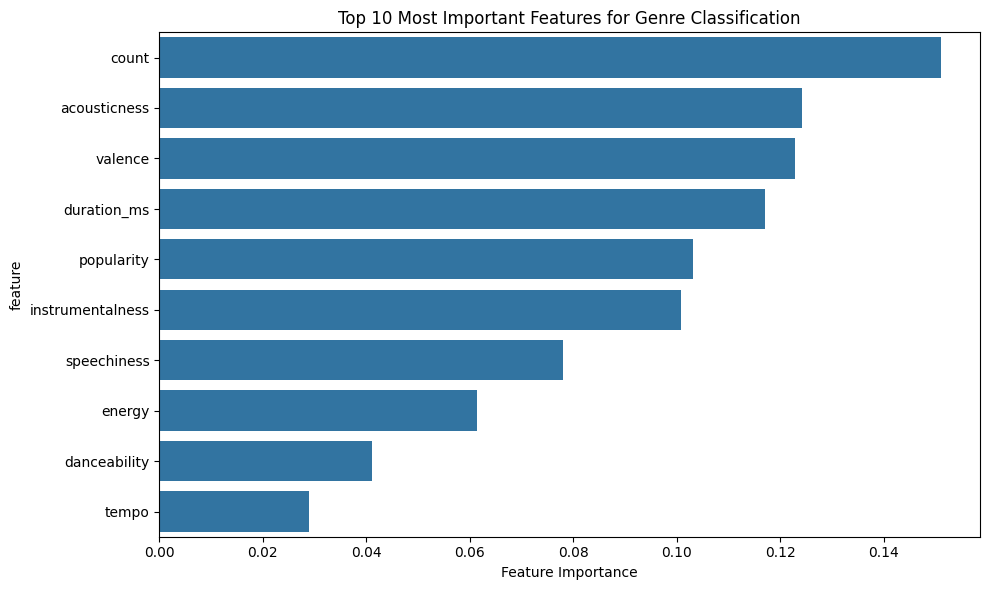

In [9]:
# Step 4: Train Decision Tree with limited genres
# Select top N most common genres
N_TOP_GENRES = 10
top_genres = df['genres'].value_counts().nlargest(N_TOP_GENRES).index

# Filter data for top genres
mask = df['genres'].isin(top_genres)
X_filtered = X_scaled[mask]
y_filtered = le.fit_transform(df[mask]['genres'])  # Re-encode with fewer classes

# Split the filtered data
X_train, X_test, y_train, y_test = train_test_split(
    X_filtered, y_filtered, test_size=0.2, random_state=42
)

# Train Decision Tree
dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Print metrics
print(f"🎯 Decision Tree Accuracy (Top {N_TOP_GENRES} genres):", 
      accuracy_score(y_test, y_pred_dt))

# Classification Report with correct labels
genre_names = le.inverse_transform(np.unique(y_filtered))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=genre_names))

# Visualize confusion matrix
plt.figure(figsize=(12, 8))
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=genre_names,
            yticklabels=genre_names)
plt.title(f'Confusion Matrix (Top {N_TOP_GENRES} Genres)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Most Important Features for Genre Classification')
plt.xlabel('Feature Importance')
plt.tight_layout()
plt.show()

In [10]:
# Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("🎯 Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=le.classes_))

🎯 Random Forest Accuracy: 0.9597673291323315

Classification Report:
                                                                             precision    recall  f1-score   support

                                   ['broadway', 'hollywood', 'show tunes']       0.00      0.00      0.00         8
['contemporary country', 'country', 'country road', 'modern country rock']       1.00      0.64      0.78        11
                                                 ['disney', 'movie tunes']       0.00      0.00      0.00         7
                                                                ['gospel']       0.00      0.00      0.00        12
                                                             ['hollywood']       0.33      0.10      0.15        10
                                                           ['movie tunes']       0.00      0.00      0.00        12
                                                ['orchestral performance']       0.00      0.00      0.00        11
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha

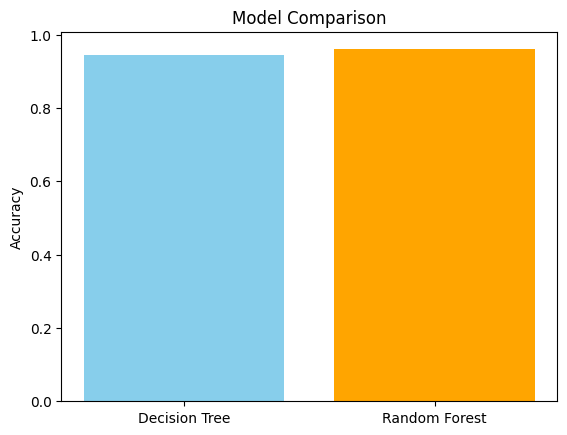

In [11]:
# Step 6: Compare results
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_rf = accuracy_score(y_test, y_pred_rf)

plt.bar(["Decision Tree", "Random Forest"], [acc_dt, acc_rf], color=["skyblue", "orange"])
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.show()